In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_mag_2016.csv'])
matrix_mag = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_mag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              894 non-null    int64  
 1   pohlavi_kod             894 non-null    int64  
 2   je_cech                 894 non-null    int64  
 3   datum_zahajeni          894 non-null    int64  
 4   rok_maturity            894 non-null    int64  
 5   maturita_nastup_rozdil  894 non-null    int64  
 6   gymnazium               894 non-null    int64  
 7   praha                   894 non-null    int64  
 8   scio                    894 non-null    int64  
 9   olym                    894 non-null    int64  
 10  zkouska                 894 non-null    int64  
 11  prominuti               894 non-null    int64  
 12  dostudoval_uspesne      894 non-null    int64  
 13  MI-PAA                  742 non-null    float64
 14  MI-MPI                  771 non-null    fl

In [4]:
matrix_mag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              894 non-null    int64  
 1   pohlavi_kod             894 non-null    int64  
 2   je_cech                 894 non-null    int64  
 3   datum_zahajeni          894 non-null    int64  
 4   rok_maturity            894 non-null    int64  
 5   maturita_nastup_rozdil  894 non-null    int64  
 6   gymnazium               894 non-null    int64  
 7   praha                   894 non-null    int64  
 8   scio                    894 non-null    int64  
 9   olym                    894 non-null    int64  
 10  zkouska                 894 non-null    int64  
 11  prominuti               894 non-null    int64  
 12  dostudoval_uspesne      894 non-null    int64  
 13  MI-PAA                  742 non-null    float64
 14  MI-MPI                  771 non-null    fl

In [5]:
matrix_mag.mean()

studium_id                1.520646e+07
pohlavi_kod               9.731544e-02
je_cech                   8.087248e-01
datum_zahajeni            2.017661e+03
rok_maturity              2.017610e+03
maturita_nastup_rozdil    5.145414e-02
gymnazium                -8.859060e-01
praha                     6.599553e-02
scio                      4.250559e-02
olym                      7.158837e-02
zkouska                   3.020134e-02
prominuti                 2.908277e-02
dostudoval_uspesne        5.671141e-01
MI-PAA                    2.487197e+00
MI-MPI                    2.664721e+00
MI-PDP.16                 1.980104e+00
MI-SPI.16                 2.342251e+00
dtype: float64

## Příprava datasetu

### Nastavení indexu

In [6]:
matrix_mag = matrix_mag.set_index(['studium_id'])

### Přidání příznaků

In [7]:
matrix_mag['prumer'] = matrix_mag.loc[:, 'MI-PAA':'MI-SPI.16'].mean(axis=1)

In [8]:
matrix_mag.mean()

pohlavi_kod                  0.097315
je_cech                      0.808725
datum_zahajeni            2017.661074
rok_maturity              2017.609620
maturita_nastup_rozdil       0.051454
gymnazium                   -0.885906
praha                        0.065996
scio                         0.042506
olym                         0.071588
zkouska                      0.030201
prominuti                    0.029083
dostudoval_uspesne           0.567114
MI-PAA                       2.487197
MI-MPI                       2.664721
MI-PDP.16                    1.980104
MI-SPI.16                    2.342251
prumer                       2.561157
dtype: float64

### Doplnění NaN hodnot

##### Doplnění pomocí KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
matrix_mag = pd.DataFrame(imputer.fit_transform(matrix_mag), index=matrix_mag.index, columns=matrix_mag.columns)

In [10]:
matrix_mag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 13027706 to 17204206
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             894 non-null    float64
 1   je_cech                 894 non-null    float64
 2   datum_zahajeni          894 non-null    float64
 3   rok_maturity            894 non-null    float64
 4   maturita_nastup_rozdil  894 non-null    float64
 5   gymnazium               894 non-null    float64
 6   praha                   894 non-null    float64
 7   scio                    894 non-null    float64
 8   olym                    894 non-null    float64
 9   zkouska                 894 non-null    float64
 10  prominuti               894 non-null    float64
 11  dostudoval_uspesne      894 non-null    float64
 12  MI-PAA                  894 non-null    float64
 13  MI-MPI                  894 non-null    float64
 14  MI-PDP.16               894 no

#### Zaokrouhlení doplněných hodnot

In [11]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [12]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [13]:
matrix_mag.loc[:, 'MI-PAA':'MI-SPI.16'] = matrix_mag.loc[:, 'MI-PAA':'MI-SPI.16'].applymap(custom_round)

In [14]:
matrix_mag

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,MI-PAA,MI-MPI,MI-PDP.16,MI-SPI.16,prumer
studium_id,,,,,,,,,,,,,,,,,
13027706,0.0,1.0,2016.0,2016.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,2.5,3.0,4.0,3.000000
14794806,0.0,1.0,2017.0,2017.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2.5,2.625000
13500006,0.0,1.0,2016.0,2016.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.5,4.0,4.000000
13020006,0.0,1.0,2016.0,2016.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.5,2.5,2.0,2.5,2.375000
13035206,1.0,0.0,2016.0,2016.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,2.5,2.5,2.5,3.0,2.666667
13030006,0.0,0.0,2016.0,2016.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.5,1.5,3.0,2.250000
17885906,0.0,1.0,2020.0,2020.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.5,1.5,2.0,1.500000
13501106,0.0,1.0,2016.0,2016.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.5,2.5,2.0,3.0,2.666667
13017206,0.0,1.0,2016.0,2016.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,1.5,2.5,2.250000


### Pomocné promenné

In [15]:
# predmety podle doporuceneho semestru
courses_1 = ['MI-PAA', 'MI-MPI']
courses_2 = ['MI-PDP.16', 'MI-SPI.16']

courses = courses_1 + courses_2

In [16]:
means = {'MI-PAA':2.5, 'MI-MPI':2.5, 'MI-PDP.16':2, 'MI-SPI.16':2.5
        }

prumer_mean = 2.5

### Nastavení příznaků na kategorické - ordinální

In [17]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4, 0], ordered=True)
# MI-PAA
matrix_mag['MI-PAA'] = matrix_mag['MI-PAA'].astype(grades_category)
# MI-MPI
matrix_mag['MI-MPI'] = matrix_mag['MI-MPI'].astype(grades_category)
# MI-PDP.16
matrix_mag['MI-PDP.16'] = matrix_mag['MI-PDP.16'].astype(grades_category)
# MI-SPI.16
matrix_mag['MI-SPI.16'] = matrix_mag['MI-SPI.16'].astype(grades_category)

### Nastavení nepředmětových atributů na kategorické

In [18]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
# pohlavi_kod
matrix_mag['pohlavi_kod'] = matrix_mag['pohlavi_kod'].astype(attr_category)
# scio
matrix_mag['scio'] = matrix_mag['scio'].astype(attr_category)
# olym
matrix_mag['olym'] = matrix_mag['olym'].astype(attr_category)
# zkouska
matrix_mag['zkouska'] = matrix_mag['zkouska'].astype(attr_category)
# prominuti
matrix_mag['prominuti'] = matrix_mag['prominuti'].astype(attr_category)

In [19]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[-1, 0, 1], ordered=False)
# je_cech
matrix_mag['je_cech'] = matrix_mag['je_cech'].astype(attr_category)
# gymnazium
matrix_mag['gymnazium'] = matrix_mag['gymnazium'].astype(attr_category)
# praha
matrix_mag['praha'] = matrix_mag['praha'].astype(attr_category)

In [20]:
matrix_mag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 13027706 to 17204206
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pohlavi_kod             894 non-null    category
 1   je_cech                 894 non-null    category
 2   datum_zahajeni          894 non-null    float64 
 3   rok_maturity            894 non-null    float64 
 4   maturita_nastup_rozdil  894 non-null    float64 
 5   gymnazium               894 non-null    category
 6   praha                   894 non-null    category
 7   scio                    894 non-null    category
 8   olym                    894 non-null    category
 9   zkouska                 894 non-null    category
 10  prominuti               894 non-null    category
 11  dostudoval_uspesne      894 non-null    float64 
 12  MI-PAA                  894 non-null    category
 13  MI-MPI                  894 non-null    category
 14  MI-PDP.16     

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [21]:
Xdata = matrix_mag.drop(columns='dostudoval_uspesne')
ydata = matrix_mag.dostudoval_uspesne

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(894, 16)

(894,)

trénovací data


(715, 16)

(715,)

testovací data


(179, 16)

(179,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [23]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [24]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [25]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}

0.923297 (+/-0.031873) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.913909 (+/-0.029614) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.915961 (+/-0.033087) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.915961 (+/-0.033087) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.915961 (+/-0.033087) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.927208 (+/-0.041865) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.916714 (+/-0.035380) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.918766 (+/-0.037729) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.922852 (+/-0.029602) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.922852 (+/-0.029602) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [26]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.911888
accuracy score (test): 0.905028


In [27]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
15,prumer,0.678134
5,gymnazium,0.321866
0,pohlavi_kod,0.000000
1,je_cech,0.000000
2,datum_zahajeni,0.000000
3,rok_maturity,0.000000
4,maturita_nastup_rozdil,0.000000
6,praha,0.000000
7,scio,0.000000
8,olym,0.000000


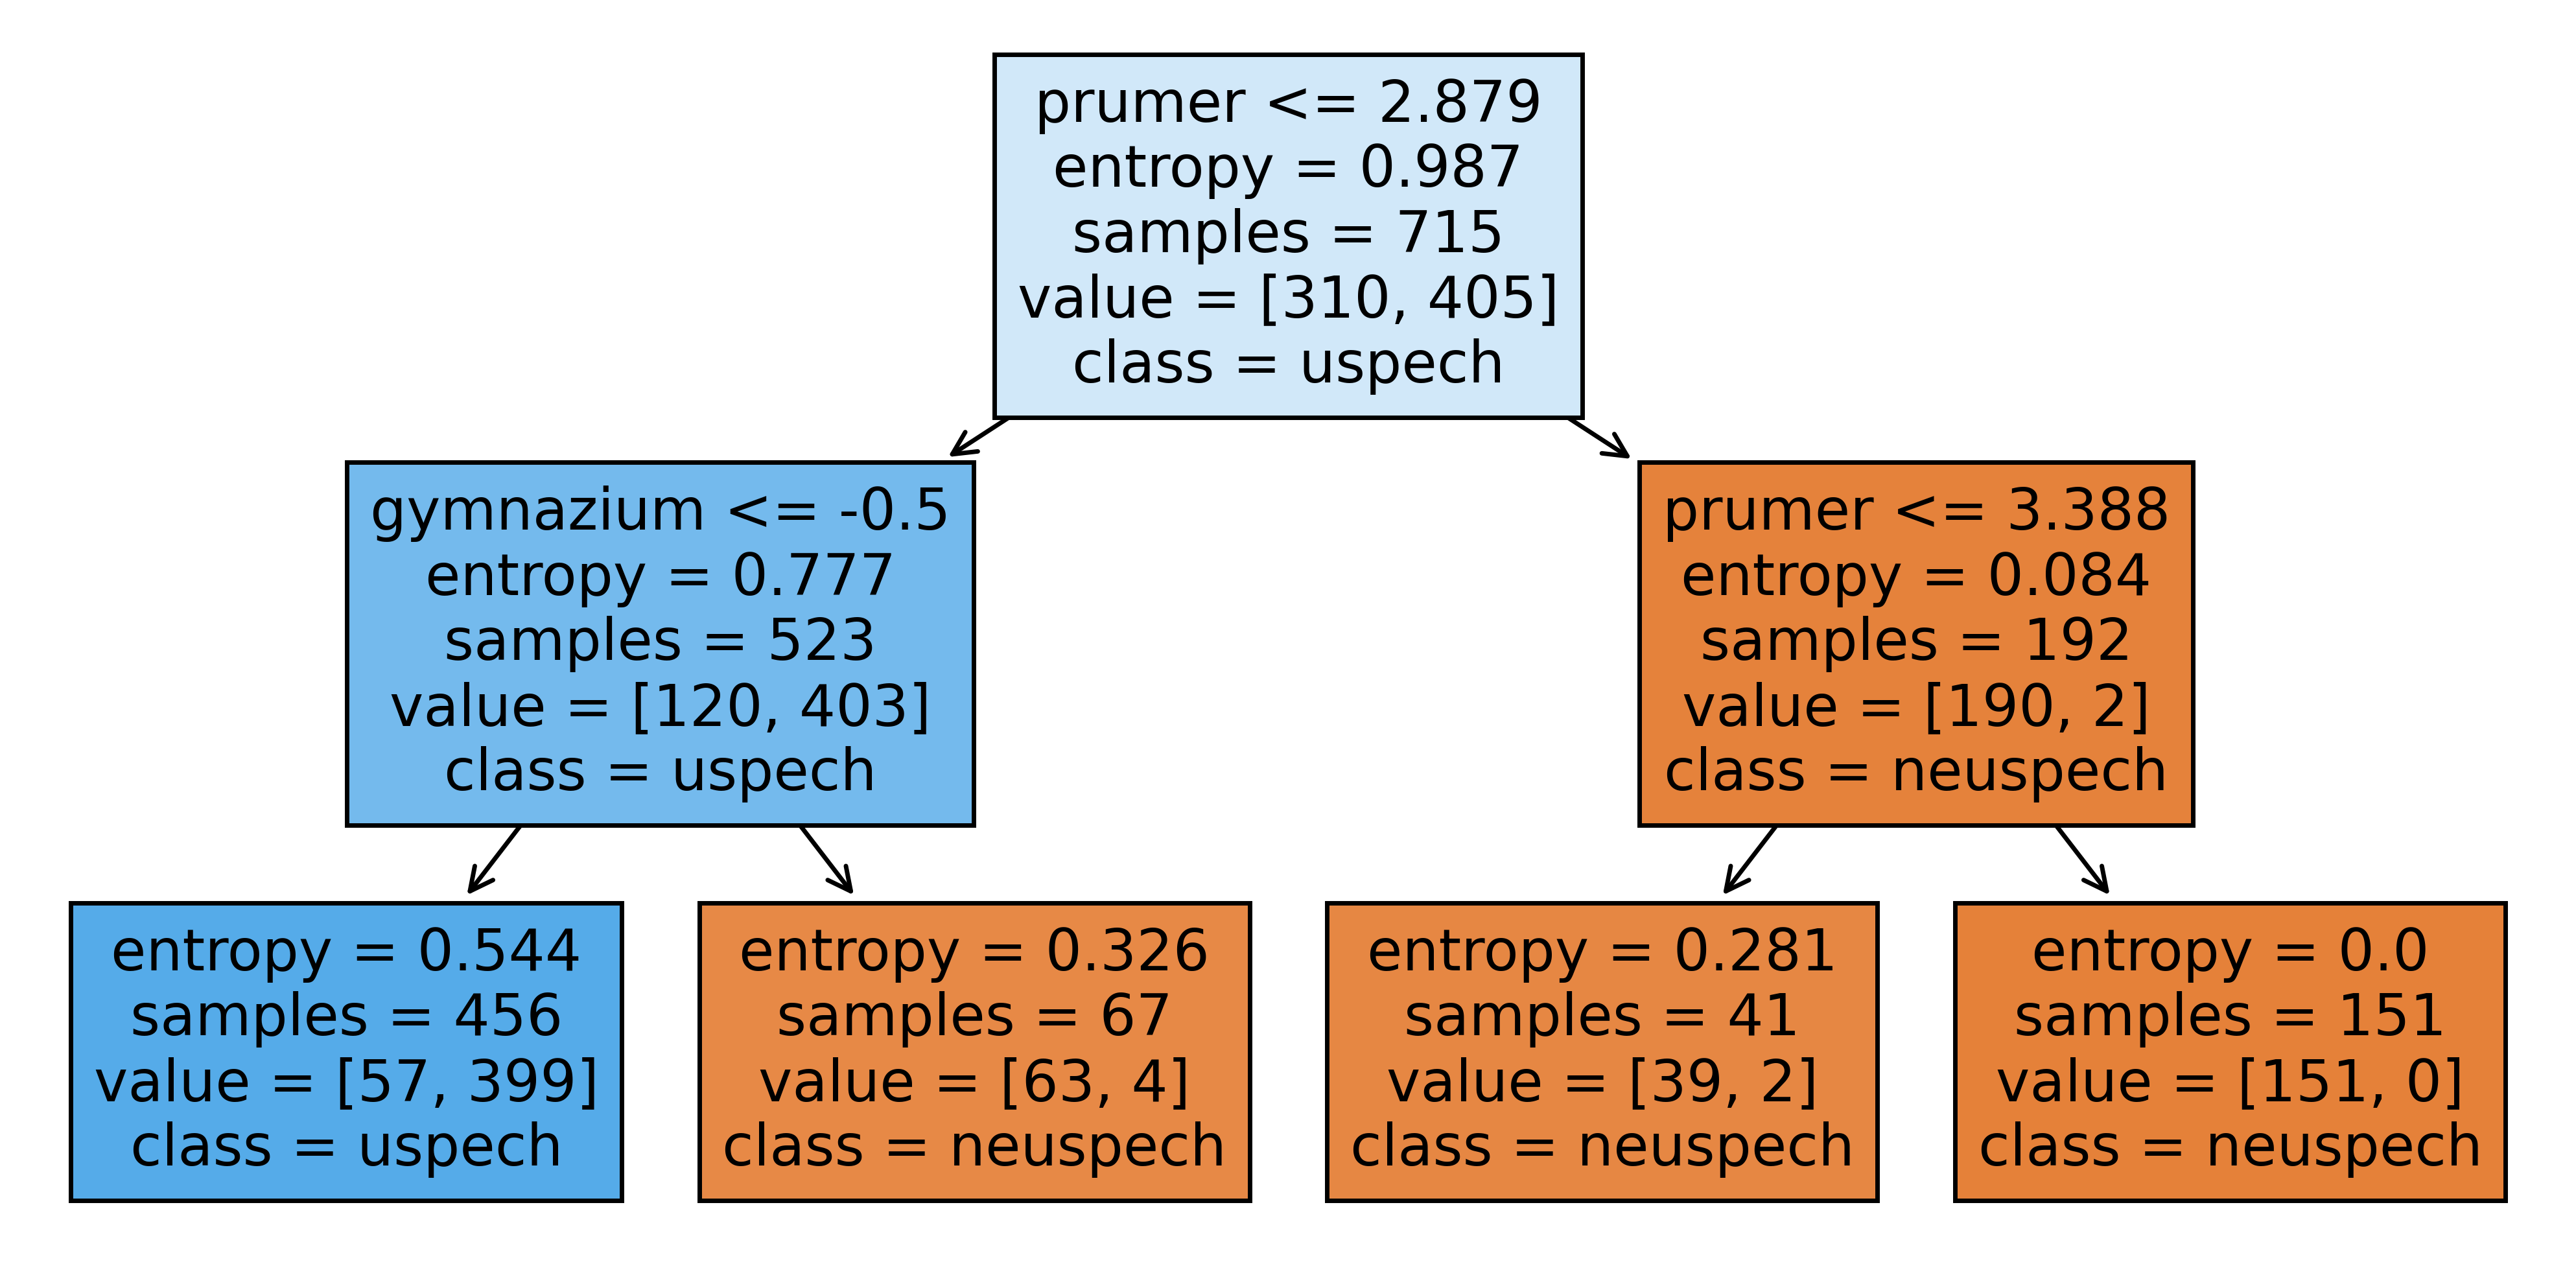

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1.png')

#### Random forest

In [29]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [30]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 15}

0.922125 (+/-0.029195) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.919434 (+/-0.032977) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.922078 (+/-0.039837) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.926038 (+/-0.038535) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.927924 (+/-0.032926) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.922716 (+/-0.051105) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.924570 (+/-0.034556) for {'criterion': 'gini', 'max_depth': 2, 'ma

In [31]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.911888
accuracy score (test): 0.905028


In [32]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
15,prumer,0.180037
12,MI-MPI,0.178243
11,MI-PAA,0.170782
13,MI-PDP.16,0.160789
2,datum_zahajeni,0.119088
3,rok_maturity,0.058987
8,olym,0.054628
5,gymnazium,0.043983
14,MI-SPI.16,0.027751
10,prominuti,0.005377


#### SVM

In [33]:
param_grid_svm = {
    'kernel':['linear', 'rbf'],
    'gamma':['auto', 'scale'],
    'C':[100, 10, 1, 0.1]
}
param_comb_svm = ParameterGrid(param_grid_svm)

In [34]:
svc_f1 = get_best_parameters(param_grid_svm, SVC)

Best hyper-parameters are: 
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

0.929663 (+/-0.041608) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.926523 (+/-0.027594) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.929663 (+/-0.041608) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.723214 (+/-0.000000) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.910838 (+/-0.024699) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.933419 (+/-0.025806) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.910838 (+/-0.024699) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.723214 (+/-0.000000) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.920123 (+/-0.019220) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.931419 (+/-0.035383) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.920123 (+/-0.019220) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.723214 (+/-0.000000) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.920385 (+/-0.023896) for {'C': 0.1, 'gamma': 'aut

In [35]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svc_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svc_f1.predict(Xtest))))

accuracy score (train): 0.927273
accuracy score (test): 0.910615


#### Adaboost

In [36]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [37]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.30000000000000004, 'n_estimators': 40}

0.864736 (+/-0.017227) for {'learning_rate': 0.1, 'n_estimators': 5}
0.890756 (+/-0.043964) for {'learning_rate': 0.1, 'n_estimators': 10}
0.923297 (+/-0.031873) for {'learning_rate': 0.1, 'n_estimators': 15}
0.925968 (+/-0.038290) for {'learning_rate': 0.1, 'n_estimators': 20}
0.925968 (+/-0.038290) for {'learning_rate': 0.1, 'n_estimators': 25}
0.926972 (+/-0.034989) for {'learning_rate': 0.1, 'n_estimators': 30}
0.926858 (+/-0.034658) for {'learning_rate': 0.1, 'n_estimators': 35}
0.926858 (+/-0.034658) for {'learning_rate': 0.1, 'n_estimators': 40}
0.925587 (+/-0.031199) for {'learning_rate': 0.1, 'n_estimators': 45}
0.883576 (+/-0.044307) for {'learning_rate': 0.2, 'n_estimators': 5}
0.921995 (+/-0.029651) for {'learning_rate': 0.2, 'n_estimators': 10}
0.924583 (+/-0.034701) for {'learning_rate': 0.2, 'n_estimators': 15}
0.925718 (+/-0.031534) for {'learning_rate': 0.2, 'n_estimators': 20}
0.92

In [38]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.918881
accuracy score (test): 0.905028


In [39]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
15,prumer,0.500
13,MI-PDP.16,0.250
5,gymnazium,0.075
2,datum_zahajeni,0.050
8,olym,0.050
14,MI-SPI.16,0.050
11,MI-PAA,0.025
0,pohlavi_kod,0.000
1,je_cech,0.000
3,rok_maturity,0.000


#### Xgboost

In [40]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [41]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 3}

0.929475 (+/-0.032922) for {'eta': 0.1, 'max_depth': 3}
0.926928 (+/-0.025576) for {'eta': 0.1, 'max_depth': 4}
0.926783 (+/-0.031939) for {'eta': 0.1, 'max_depth': 5}
0.923997 (+/-0.031766) for {'eta': 0.1, 'max_depth': 6}
0.922892 (+/-0.034921) for {'eta': 0.1, 'max_depth': 7}
0.925670 (+/-0.029944) for {'eta': 0.2, 'max_depth': 3}
0.923218 (+/-0.038718) for {'eta': 0.2, 'max_depth': 4}
0.921504 (+/-0.038179) for {'eta': 0.2, 'max_depth': 5}
0.923544 (+/-0.028681) for {'eta': 0.2, 'max_depth': 6}
0.918318 (+/-0.023389) for {'eta': 0.2, 'max_depth': 7}
0.925485 (+/-0.030017) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.919228 (+/-0.036172) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.918428 (+/-0.037631) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.914640 (+/-0.043207) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.914360 (+/-0.036772) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.916731 (+/-0.048647)

In [42]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.930070
accuracy score XGBoost (val): 0.910615


In [43]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [44]:
feat_imp

prumer            127.0
MI-PDP.16          89.0
MI-SPI.16          58.0
MI-PAA             58.0
datum_zahajeni     39.0
olym               26.0
praha              26.0
MI-MPI             22.0
gymnazium          16.0
rok_maturity       10.0
je_cech             8.0
pohlavi_kod         6.0
dtype: float64

#### MLP

In [45]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [46]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.913287
accuracy score mlp (val): 0.910615


#### Lineární regrese

In [47]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [48]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.2966000688564225
RMSE reg (test): 2387366.474497987


#### kNN

In [49]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [50]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

0.884738 (+/-0.039513) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.884738 (+/-0.039513) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.890750 (+/-0.058472) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.890750 (+/-0.058472) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.860424 (+/-0.035336) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.880767 (+/-0.029248) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.860567 (+/-0.037246) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.885747 (+/-0.050493) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.913029 (+/-0.049363) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.908346 (+/-0.037034) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.917335 (+/-0.043307) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.917592 (+/-0.036148) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9

In [51]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.918881
accuracy score knn (val): 0.910615


## Testování po semestrech

### Doplnění 0

#### Pouze nepředmětové příznaky

In [52]:
Xtest_0 = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0.loc[:, course] = 0
Xtest_0.loc[:, 'prumer'] = 0

#### 1. semestr

In [54]:
Xtest_1 = Xtest.copy(deep=True)

courses_not_use = courses_2
for course in courses_not_use:
    Xtest_1.loc[:, course] = 0

courses_to_use = courses_1
Xtest_1.loc[:, 'prumer'] = Xtest_1.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

### Doplnění průměrem

#### Pouze nepředmětové příznaky

In [55]:
Xtest_0_mean = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0_mean.loc[:, course] = means[course]
    
Xtest_0_mean.loc[:, 'prumer'] = Xtest_0.loc[:, courses[0]:courses[-1]].mean(axis=1)

#### První semestr

In [56]:
Xtest_1_mean = Xtest.copy(deep=True)

courses_not_use = courses_2
for course in courses_not_use:
    Xtest_1_mean.loc[:, course] = means[course]

courses_to_use = courses_1
Xtest_1_mean['prumer'] = Xtest_1_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

## Výsledky

In [57]:
results = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2])
results_mean = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2])

results_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2])
results_mean_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2])

In [58]:
results_reg = pd.DataFrame(columns=['reg'], index=[0, 1, 2])
results_reg_mean = pd.DataFrame(columns=['reg'], index=[0, 1, 2])

### Linearní regrese měřena pomocí RMSE

#### Doplněno 0

In [59]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest}
for i in range(0, 2):   
    results_reg.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test[i]), np.array(ytest))), 3)

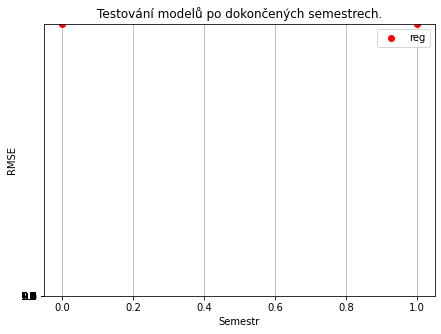

In [60]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg['reg'].index
yreg = results_reg['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.plot(xreg, yreg, 'o', color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [61]:
results_reg

,reg
0,2.38737e+06
1,2.38737e+06
2,NaN


#### Doplněno průměrem

In [62]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest}
for i in range(0, 2):
    results_reg_mean.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test_mean[i]), np.array(ytest))), 3)

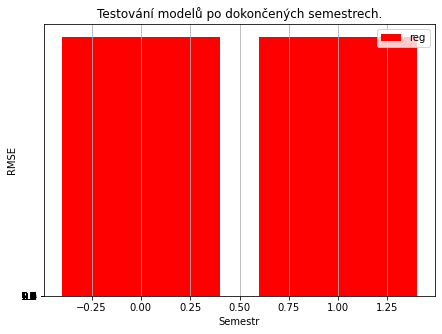

In [63]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg_mean['reg'].index
yreg = results_reg_mean['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.bar(xreg, yreg, color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [64]:
results_reg_mean

,reg
0,2.38737e+06
1,2.38737e+06
2,NaN


## Ostatní modely
### Měřeno accuracy_score

In [70]:
metrics.accuracy_score(ytest, rf_f1.predict(Xtest_0))

0.664804469273743

In [71]:
metrics.accuracy_score(ytest, rf_f1.predict(Xtest_1))

0.8715083798882681

In [69]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest}
for i in range(0, 8):
    #results.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test[i])), 3)
    results.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test[i])), 3)
    results.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test[i])), 3)
    results.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test[i])), 3)
    results.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test[i])), 3)
    results.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test[i])), 3)

KeyError: 3

In [66]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest}
for i in range(0, 8):
    results_mean.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test_mean[i])), 3)

KeyError: 3

#### Po doplnění 0

In [ ]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results['dt'].index
ydt = results['dt'].values

xrf = results['rf'].index
yrf = results['rf'].values

xsvm = results['svm'].index
ysvm = results['svm'].values

xab = results['ab'].index
yab = results['ab'].values

xxgb = results['xgb'].index
yxgb = results['xgb'].values

xmlp = results['mlp'].index
ymlp = results['mlp'].values

xknn = results['knn'].index
yknn = results['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [ ]:
labels = np.array(results.index)

ydt = results['dt'].values

yrf = results['rf'].values

ysvm = results['svm'].values

yab = results['ab'].values

yxgb = results['xgb'].values

ymlp = results['mlp'].values

yknn = results['knn'].values

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , ydt, width, label='Decision tree')
rects_rf = ax.bar(x + width, yrf, width, label='Random forest')
rects_svm = ax.bar(x + width * 2, ysvm, width, label='Support vector machines')
rects_ab = ax.bar(x + width * 3, yab, width, label='AdaBoost')
rects_xgb = ax.bar(x + width * 4, yxgb, width, label='XGBoost')
rects_mlp = ax.bar(x + width * 5, ymlp, width, label='Multilayer perceptron')
rects_knn = ax.bar(x + width * 6, yknn, width, label='k-nearest neighbors')

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Počet dokončených semestrů')
ax.set_title('Testování modelů po dokončených semestrech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [ ]:
results

#### Po doplněni průměrem

In [ ]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean['dt'].index
ydt = results_mean['dt'].values

xrf = results_mean['rf'].index
yrf = results_mean['rf'].values

xsvm = results_mean['svm'].index
ysvm = results_mean['svm'].values

xab = results_mean['ab'].index
yab = results_mean['ab'].values

xxgb = results_mean['xgb'].index
yxgb = results_mean['xgb'].values

xmlp = results_mean['mlp'].index
ymlp = results_mean['mlp'].values

xknn = results_mean['knn'].index
yknn = results_mean['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [ ]:
results_mean

### Měřeno f1_score

In [ ]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

In [ ]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_mean_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

#### Po doplnění 0

In [ ]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_f1['dt'].index
ydt = results_f1['dt'].values

xrf = results_f1['rf'].index
yrf = results_f1['rf'].values

xsvm = results_f1['svm'].index
ysvm = results_f1['svm'].values

xab = results_f1['ab'].index
yab = results_f1['ab'].values

xxgb = results_f1['xgb'].index
yxgb = results_f1['xgb'].values

xmlp = results_f1['mlp'].index
ymlp = results_f1['mlp'].values

xknn = results_f1['knn'].index
yknn = results_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [ ]:
results_f1

#### Po doplněni průměrem

In [ ]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean_f1['dt'].index
ydt = results_mean_f1['dt'].values

xrf = results_mean_f1['rf'].index
yrf = results_mean_f1['rf'].values

xsvm = results_mean_f1['svm'].index
ysvm = results_mean_f1['svm'].values

xab = results_mean_f1['ab'].index
yab = results_mean_f1['ab'].values

xxgb = results_mean_f1['xgb'].index
yxgb = results_mean_f1['xgb'].values

xmlp = results_mean_f1['mlp'].index
ymlp = results_mean_f1['mlp'].values

xknn = results_mean_f1['knn'].index
yknn = results_mean_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [ ]:
results_mean_f1